# AI Assistant
## Group Members:
 - Krylova Alena
 - Dudic Mateja
 - Saavedra Triana Erwin Omar
 - Maringer Kelvin

## Python Version:
 - 3.13

## Contributions:
 - Krylova Alena:
     - ...
 - Dudic Mateja:
     - ...
 - Saavedra Triana Erwin Omar:
     - ...
 - Maringer Kelvin:
     - ...

# FIRST TIME SETUP
# ----------------
# MAKE SURE THAT THIS CELL RUNS WITHOUT ERRORS BEFORE PROCEEDING
# ----------------

In [2]:
import matplotlib.pyplot as plt
# All the packages that have to be installed should be listed here
%pip install numpy pandas matplotlib seaborn kagglehub ipywidgets --quiet
# This will filter out the output from Jupyter Notebooks when committing to git, so that diffs are cleaner
! git config filter.strip-notebook-output.clean 'jupyter nbconvert --ClearOutputPreprocessor.enabled=True --to=notebook --stdin --stdout --log-level=ERROR'

import kagglehub
import platform

# Download latest version
dataset_path = kagglehub.dataset_download("prince7489/daily-ai-assistant-usage-behavior-dataset") + ("/Daily_AI_Assistant_Usage_Behavior_Dataset.csv" if platform.system() != "Windows" else "\\Daily_AI_Assistant_Usage_Behavior_Dataset.csv")

print("Path to dataset files:", dataset_path)

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\admin\AppData\Local\Python\pythoncore-3.14-64\python.exe -m pip install --upgrade pip
error: no action specified


Path to dataset files: C:\Users\admin\.cache\kagglehub\datasets\prince7489\daily-ai-assistant-usage-behavior-dataset\versions\1\Daily_AI_Assistant_Usage_Behavior_Dataset.csv


# ----------------------
# ----------------------

In [3]:
#All the imports should be listed here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sea


## *Dataset Overview*
The Daily AI Assistant Usage Behavior Dataset captures real-world patterns of how users interact with AI assistants throughout their daily activities. It provides insights into when, how, and for what purposes people used AI tools, as well as session characteristics and user satisfaction.

The dataset is published on the Kaggle platform and is intended for researchers, developers, and data science practitioners interested in user behavior analysis, personalization systems, recommendation engines, and conversational AI. It covers a wide range of AI usage scenarios, including learning, productivity, research, and routine daily tasks.

The dataset contains 300 rows and 8 columns.

*Features (their meaning and data types):*  
1st column: timestamp - date and time when the interaction with an AI tool started, data type - categorical (string)  
2nd column: device - type of device which was used to access an AI tool (desktop, mobile, smart speaker), data type - categorical (string)  
3rd column: usage_category - for what purpose the user used an AI tool (education, daily tasks, research and etc), data type - categorical (string)  
4th column: prompt_length - lenght of the user`s prompt (measured in charakters), data type - integer  
5th column: session_length_minutes - duration of the session in minutes, data type - float  
6th column: satisfaction_rating - user satisfaction score from 1 to 5, data type - integer  
7th column: assistant_model - which AI assistant model was used during the session, data type - categorical(string)  
8th column: tokens_used - number of tokens used during the session, data type - integer  

Most features from the data set are categorical, making the dataset suitable for analyzing patterns and user behavior segmentation (for example, feature 'timestamp' allows to see if people use AI tools more often on weeekdays or weekends, in the mornings or in the evenings).

To obtain a statistical summary of the numerical features, the describe() method was used.
It provided key statistics such as mean, standard deviation, minimum and maximum values, as well as quartiles. It allows to better understand distributaion of data.   
*Some observations from the desccribe() function:*   
The average prompt length is 129 characters, it indicates that users often submit detailed prompts.  
The average session duration is about 7.7 minutes, indicating that most interactions with the AI assistant are relatively short.  
The average satisfaction rating is close to 3 (on a scale from 1 to 5), which shows users` experience in general is neutral (or positiv.)  
Token usage varies significantly, showing the differences in query complexity.  


In [4]:
## Code for the dataset overview Here
data = pd.read_csv(dataset_path)
print(data.head())
print(data.info())   # to get information about the dataframe (number of rows, columns, data types)
# to get basic statistics about the dataframe (mean, std, min, max, etc.)
print(data.describe())

             timestamp         device usage_category  prompt_length  \
0  2025-02-20 03:29:00        Desktop      Education             14   
1  2025-01-08 18:28:00         Mobile    Daily Tasks             32   
2  2025-01-12 17:56:00  Smart Speaker      Education            236   
3  2025-01-04 09:11:00  Smart Speaker   Productivity             98   
4  2025-02-14 19:59:00  Smart Speaker       Research            220   

   session_length_minutes  satisfaction_rating assistant_model  tokens_used  
0                    7.08                    5         GPT-5.1           44  
1                   13.07                    2          GPT-4o         1047  
2                   10.15                    4          GPT-4o         1379  
3                   14.45                    1           GPT-5         1105  
4                    4.50                    5         GPT-5.1          107  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 

## *Data Quality Check*



Missing values per columns: 
 timestamp                 0
device                    0
usage_category            0
prompt_length             0
session_length_minutes    0
satisfaction_rating       0
assistant_model           0
tokens_used               0
dtype: int64


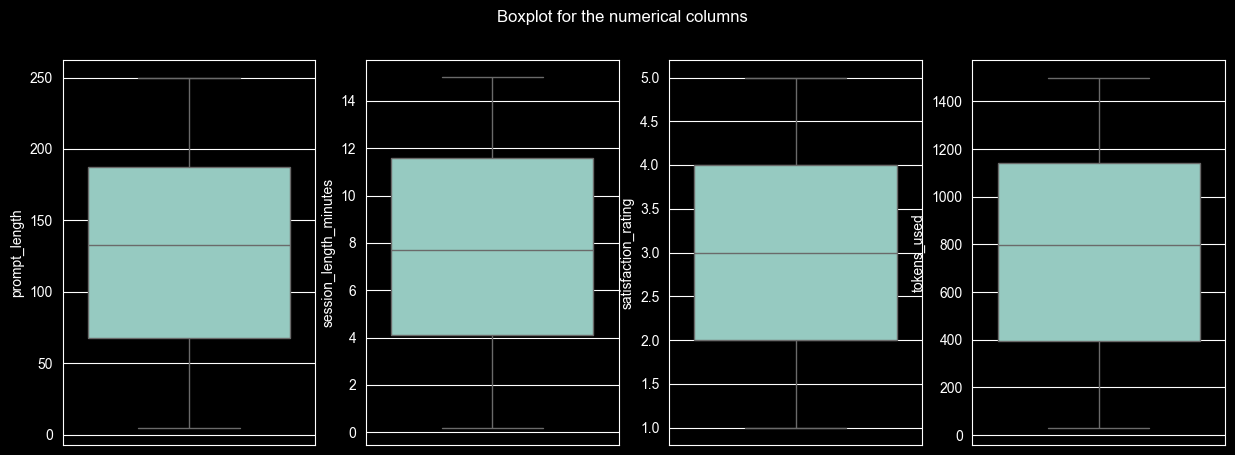

device
Smart Speaker    83
Desktop          81
Mobile           68
Tablet           68
Name: count, dtype: int64
usage_category
Education        54
Productivity     46
Writing          46
Research         42
Entertainment    40
Daily Tasks      36
Coding           36
Name: count, dtype: int64
assistant_model
GPT-4o     79
o1         59
GPT-5      56
Mini       55
GPT-5.1    51
Name: count, dtype: int64


In [5]:
## Code for the data quality check Here
print(f"Missing values per columns: \n {data.isnull().sum()}") 
# The dataset contains no missing values
rows = 1
cols = len(data.select_dtypes(include=[np.number]).columns)
fig, axes = plot.subplots(rows, cols, figsize=(15,5))
axes = axes.flatten()

for i, col in enumerate(data.select_dtypes(include=[np.number]).columns):
    sea.boxplot(y=data[col], ax=axes[i])
plot.suptitle("Boxplot for the numerical columns ")
plot.show()

#from the boxplots we can see that there are no outliers in the numerical columns

print(data['device'].value_counts())
print(data['usage_category'].value_counts())
print(data['assistant_model'].value_counts())
# For the categorical columns, we examined  the unique values and their frequencies. There are no unusual or extremely rare entries, so no outliers were detected in the dataset.


## *Data-Preprocessing*
 - Additional Notes etc...

In [10]:
# From here you can take for the Data Quality Check
RAW_data = pd.read_csv(dataset_path)

# first we check the number of missing values in each column
print(RAW_data.isnull().sum())
# after checking we can see that there are no missing values in the dataset

# so for the outliers in this dataset , I think the best aproach would be to leave them and just mark them as outliers. In this dataset the outliers might be relevant data from users that have a diferent behavior than the average user, so removing them would mean losing relevant data.

# now we will check for outliers using the IQR method

y = RAW_data.select_dtypes(include=[np.number])
print(y)
for column in y:
    quartile_min = RAW_data[column].quantile(0.25)
    quartile_max = RAW_data[column].quantile(0.75)

    IQR = quartile_max - quartile_min

    lower_bound = quartile_min - 1.5 * IQR
    upper_bound = quartile_max + 1.5 * IQR

    outliers_promt_length = RAW_data[(RAW_data[column] < lower_bound) | (RAW_data[column] > upper_bound)].count()
    outliers_promt_length = outliers_promt_length.sum()

    print(f"the number of outliers in {column} is the following: \n{outliers_promt_length}")

 # Start of the data preprocessing

# after checking we can see that there are no outliers in the dataset, surprinsing but good.
# next we will check for duplicates in the dataset
x = RAW_data.duplicated().sum()
print(f"the number of duplicates in the dataset is the following: \n{x}")
# after checking we can see that there are no duplicates in the dataset

#

# so we continue with creating the required columns


# I made an funtion for this part so its easier to read , and taking noticing that the timestamp is an string i decided to slice the string to get the hour part and then convert it to int to compare it
def timeOfDay(hour):
    if 5 <= hour <= 11:
        return "morning"
    elif 12 <= hour <= 17:
        return "afternoon"
    elif 18 <= hour <= 22:
        return "evening"
    else:
        return "Night"

RAW_data["timeOfDay"] = RAW_data["timestamp"].apply(lambda x:timeOfDay(int(x[11:-6])))
RAW_data["year"] = RAW_data["timestamp"].apply(lambda x:int(x[0:4]))

# now we are going to convert the columns and timestamp to their proper datatypes

RAW_data["timestamp"] = pd.to_datetime(RAW_data["timestamp"])
RAW_data["device"] = RAW_data["device"].astype("category")
RAW_data["assistant_model"] = RAW_data["assistant_model"].astype("category")
RAW_data["timeOfDay"] = RAW_data["timeOfDay"].astype("category")
RAW_data["usage_category"] = RAW_data["usage_category"].astype("category")

# note that the numericals stay the same, and I decided to leave year as a number

RAW_data




timestamp                 0
device                    0
usage_category            0
prompt_length             0
session_length_minutes    0
satisfaction_rating       0
assistant_model           0
tokens_used               0
dtype: int64
     prompt_length  session_length_minutes  satisfaction_rating  tokens_used
0               14                    7.08                    5           44
1               32                   13.07                    2         1047
2              236                   10.15                    4         1379
3               98                   14.45                    1         1105
4              220                    4.50                    5          107
..             ...                     ...                  ...          ...
295             16                    5.02                    5          413
296             28                   13.49                    3         1493
297            112                    3.91                    4       

,timestamp,device,usage_category,prompt_length,session_length_minutes,satisfaction_rating,assistant_model,tokens_used,timeOfDay,year
0,2025-02-20 03:29:00,Desktop,Education,14,7.08,5,GPT-5.1,44,Night,2025
1,2025-01-08 18:28:00,Mobile,Daily Tasks,32,13.07,2,GPT-4o,1047,evening,2025
2,2025-01-12 17:56:00,Smart Speaker,Education,236,10.15,4,GPT-4o,1379,afternoon,2025
3,2025-01-04 09:11:00,Smart Speaker,Productivity,98,14.45,1,GPT-5,1105,morning,2025
4,2025-02-14 19:59:00,Smart Speaker,Research,220,4.50,5,GPT-5.1,107,evening,2025
...,...,...,...,...,...,...,...,...,...,...
295,2025-02-13 14:38:00,Tablet,Education,16,5.02,5,GPT-4o,413,afternoon,2025
296,2025-01-29 19:07:00,Smart Speaker,Productivity,28,13.49,3,GPT-4o,1493,evening,2025
297,2025-03-05 20:43:00,Tablet,Productivity,112,3.91,4,Mini,873,evening,2025
298,2025-02-27 21:23:00,Smart Speaker,Daily Tasks,105,1.61,4,o1,468,evening,2025


## *Data Analysis*
 - Additional Notes etc...

In [13]:
#1. Different AI Assistants used (count and percentage).

assistant = RAW_data['assistant_model'] #selecting the column assistant_model
count = assistant.value_counts() #counting how many times each assistant appears
percentage = ((count/RAW_data['assistant_model'].count())*100).round(2) #calculating the percentage of each assistants occurrence

different_assistants = pd.DataFrame({'count': count, 'percentage': percentage}) #making a dataframe with the results
print(different_assistants)
#There is 5 different AI models in the dataset

#2. Average session length per assistant model

average_session_length = RAW_data.groupby('assistant_model')['session_length_minutes'].mean().round(2)
average_session_length_output = pd.DataFrame({'Average length': average_session_length})
print(average_session_length_output)
#Average session length is relatively similar for all AI models, with the highest being GPT-5 at 8.15 and the lowest being o1 at 7.18 minutes

#3. Usage category per assistant model
usage_per_assistant = pd.pivot_table(RAW_data, index='assistant_model', columns='usage_category', aggfunc='count', values='timestamp')
print(usage_per_assistant)
# An interesting observation is that o1 is used the most for Writing and Education compared to other categories, most likely due to better reasoning than other models, 
# In general the most used models are the three GPT models, with GPT-4 being the most consistently used of the three

#4. Longest average prompt length and use time per task
longest_avg_prompt = RAW_data.groupby('usage_category')['prompt_length'].mean().round(2)
print(longest_avg_prompt)

longest_avg_time = RAW_data.groupby('usage_category')['session_length_minutes'].mean().round(2)
print(longest_avg_time)
#The longest average prompt length is in Research with 141.26 characters on average, while the longest average session length is for coding with 8.51 seconds

#5. Usage category per time of day
usage_category_per_timeOfDay = pd.pivot_table(RAW_data, index='usage_category', columns='timeOfDay', aggfunc='count', values='timestamp')
print(usage_category_per_timeOfDay)
# Most categories have a specific time of day during which they are the least used. For example, education is least used at night, while writing is the least used during the evening


#6. Popularity of assistants over time
assistant_model_per_year = pd.pivot_table(RAW_data, index='assistant_model', columns='year', aggfunc='count', values='timestamp')
print(assistant_model_per_year)
#just one year is given and the most used assistant is GPT-4

                 count  percentage
assistant_model                   
GPT-4o              79       26.33
o1                  59       19.67
GPT-5               56       18.67
Mini                55       18.33
GPT-5.1             51       17.00
                 Average length
assistant_model                
GPT-4o                     7.76
GPT-5                      8.15
GPT-5.1                    8.12
Mini                       7.58
o1                         7.18
usage_category   Coding  Daily Tasks  Education  Entertainment  Productivity  \
assistant_model                                                                
GPT-4o                8            9         14             14            15   
GPT-5                 7            8         10              4            11   
GPT-5.1               7           11          6             10             5   
Mini                  9            4          8              7             9   
o1                    5            4         16    

C:\Users\admin\AppData\Local\Temp\ipykernel_10568\291883607.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_session_length = RAW_data.groupby('assistant_model')['session_length_minutes'].mean().round(2)
C:\Users\admin\AppData\Local\Temp\ipykernel_10568\291883607.py:19: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  usage_per_assistant = pd.pivot_table(RAW_data, index='assistant_model', columns='usage_category', aggfunc='count', values='timestamp')
C:\Users\admin\AppData\Local\Temp\ipykernel_10568\291883607.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pan

Most people seem to use GPT-4o, which is interesting as it is not exactly the cheapest model available.
The biggest platform is relatively suprising: smart speakers. I assume that this means devices like Amazon Alexa and Google Home, which is interesting since these devices are not really known for their AI capabilities. Wired... and interesting!
The most common usage for AI seems to be education. Depending on the definition of this category, this could mean that a lot of people are using these assistats for homework and study-help.
This honestly makes me question where this data is from, since I would expect a LOT more people to use AI in a more professional setting (work, coding, writing etc.) rather than for education.
Coding one of the least common, which is very suprising to me, considering that AI coding assistants are one of the more ACTUALY USEFUL applications of AI right now. Interesting!


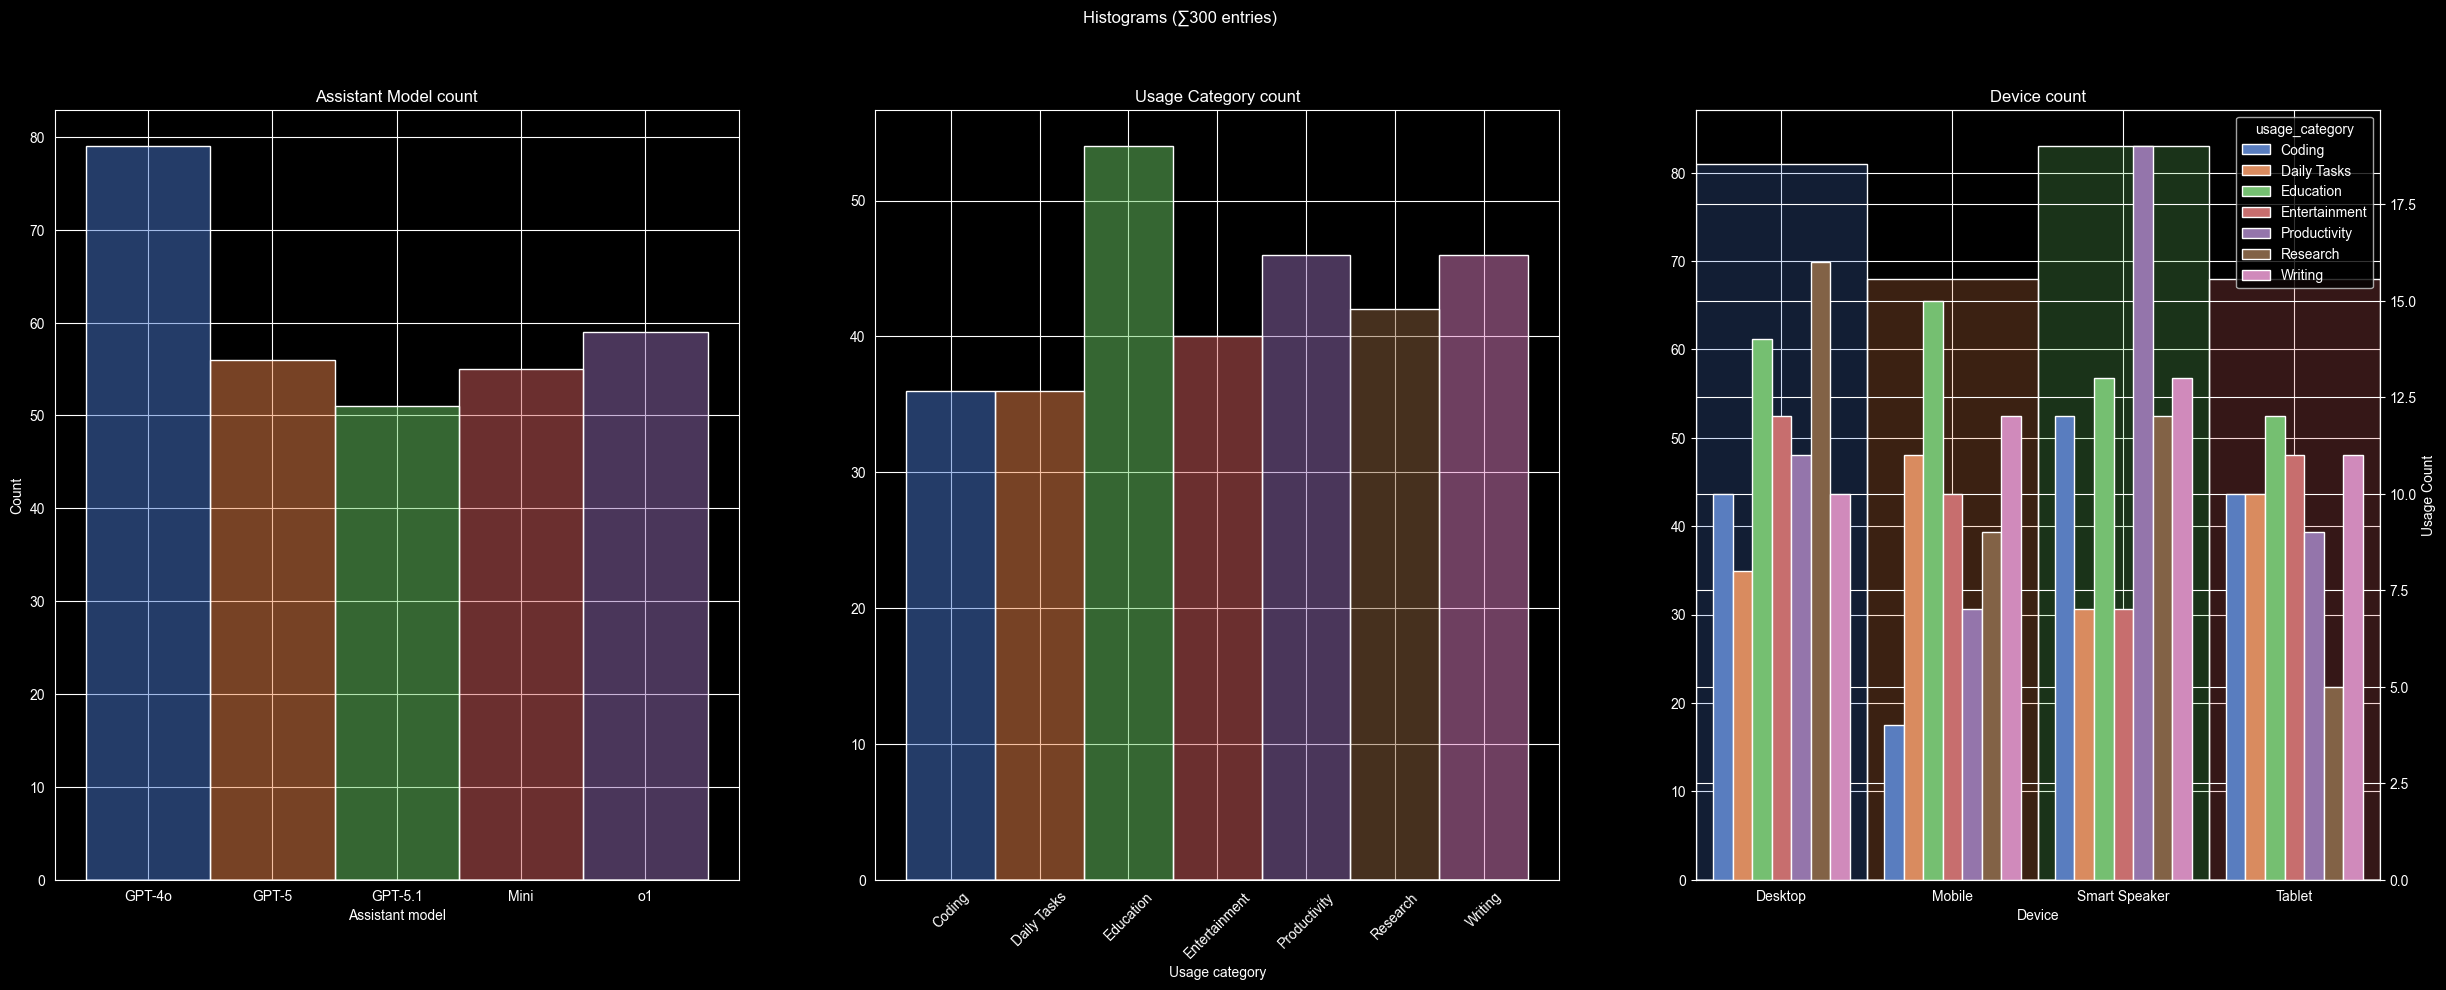

This is actually quite interesting! The session length seems to be shorter on desktop devices compared to mobile devices, which is wired. (one would think that desktop users would spend more time because of work/study etc.)
Similarly, tablets have the longest session lengths on average. This divide between mobile and desktop could stem from the different use cases for each device type. (or the time it takes to type / enter prompts)
This points towards desktop users using the AI assistant for quick queries, while mobile/tablet users might be engaging in longer interactions. Strange!
Looking at the prompt lengths, we can see that desktop users tend to have longer prompts on average compared to mobile and tablet users.
This could be due to the ease of typing on a physical keyboard, allowing for longer and more complex prompts. This is pretty strange though, since the session lengths were shorter on desktop.
As expected, the more advanced models like GPT-5 and GPT-4o tend to use more token

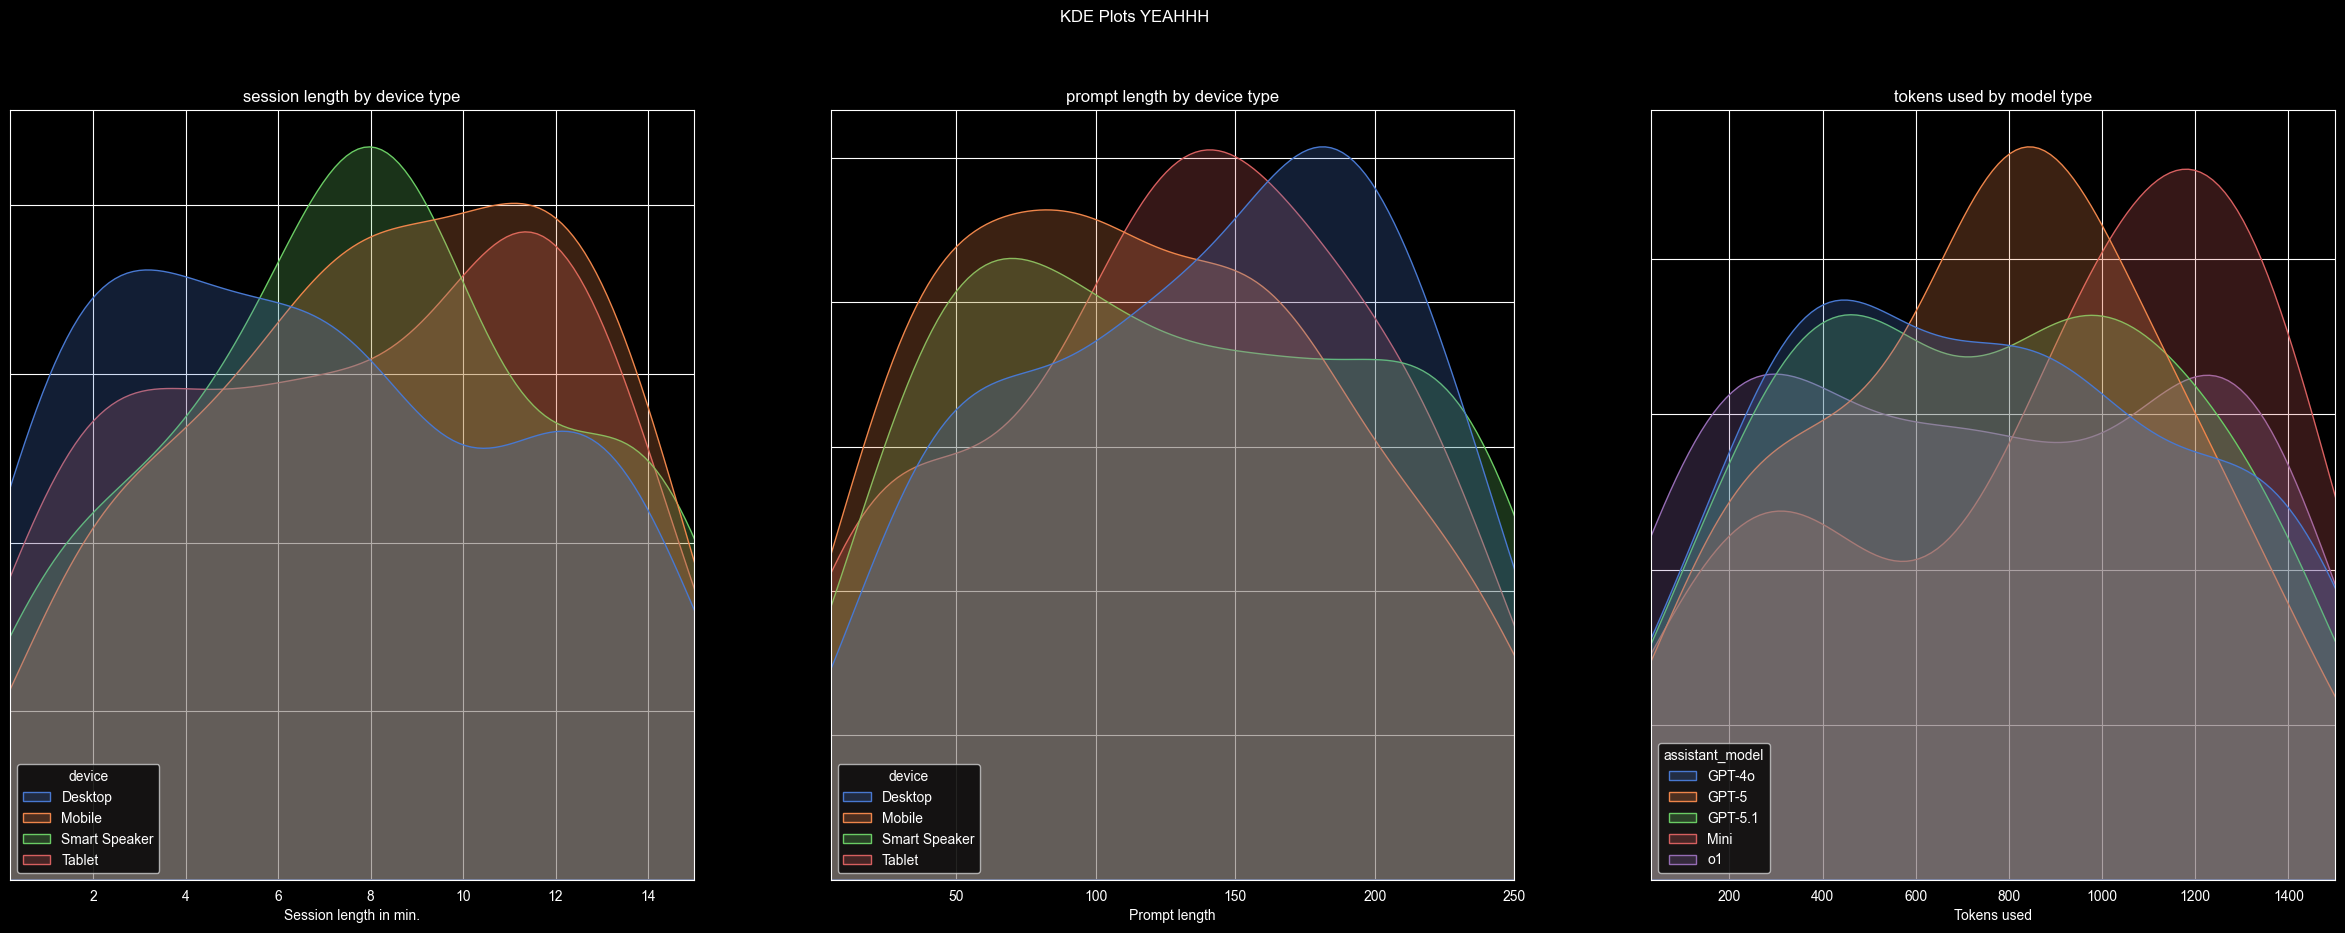

assistant model vs tokens used is actually quite interesting (genuenly!). One can see that the "advancedness" of the model doesn't really correlate with the number of tokens used. This could either point towards good optimization of the newer models, or simply that users are using the models in different ways.
Mini seems to have the highest median token, whilst having a relatively big spread. The token size seems to vary quite a lot.
device to session length is also notable, in that the session length seems to be quite stable across the different device types. The spread is also quite small (ranging from ~11 to ~5 minutes on most devices)
                 satisfaction_rating
assistant_model                     
GPT-4o                      2.962025
GPT-5                       2.946429
GPT-5.1                     3.058824
Mini                        2.872727
o1                          3.101695
                 satisfaction_rating
assistant_model                     
GPT-4o              

C:\Users\admin\AppData\Local\Temp\ipykernel_10568\875639350.py:158: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(RAW_data[["assistant_model","satisfaction_rating"]].groupby("assistant_model").mean())
C:\Users\admin\AppData\Local\Temp\ipykernel_10568\875639350.py:159: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(RAW_data[["assistant_model","satisfaction_rating"]].groupby("assistant_model").quantile(.75))
C:\Users\admin\AppData\Local\Temp\ipykernel_10568\875639350.py:160: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass obse

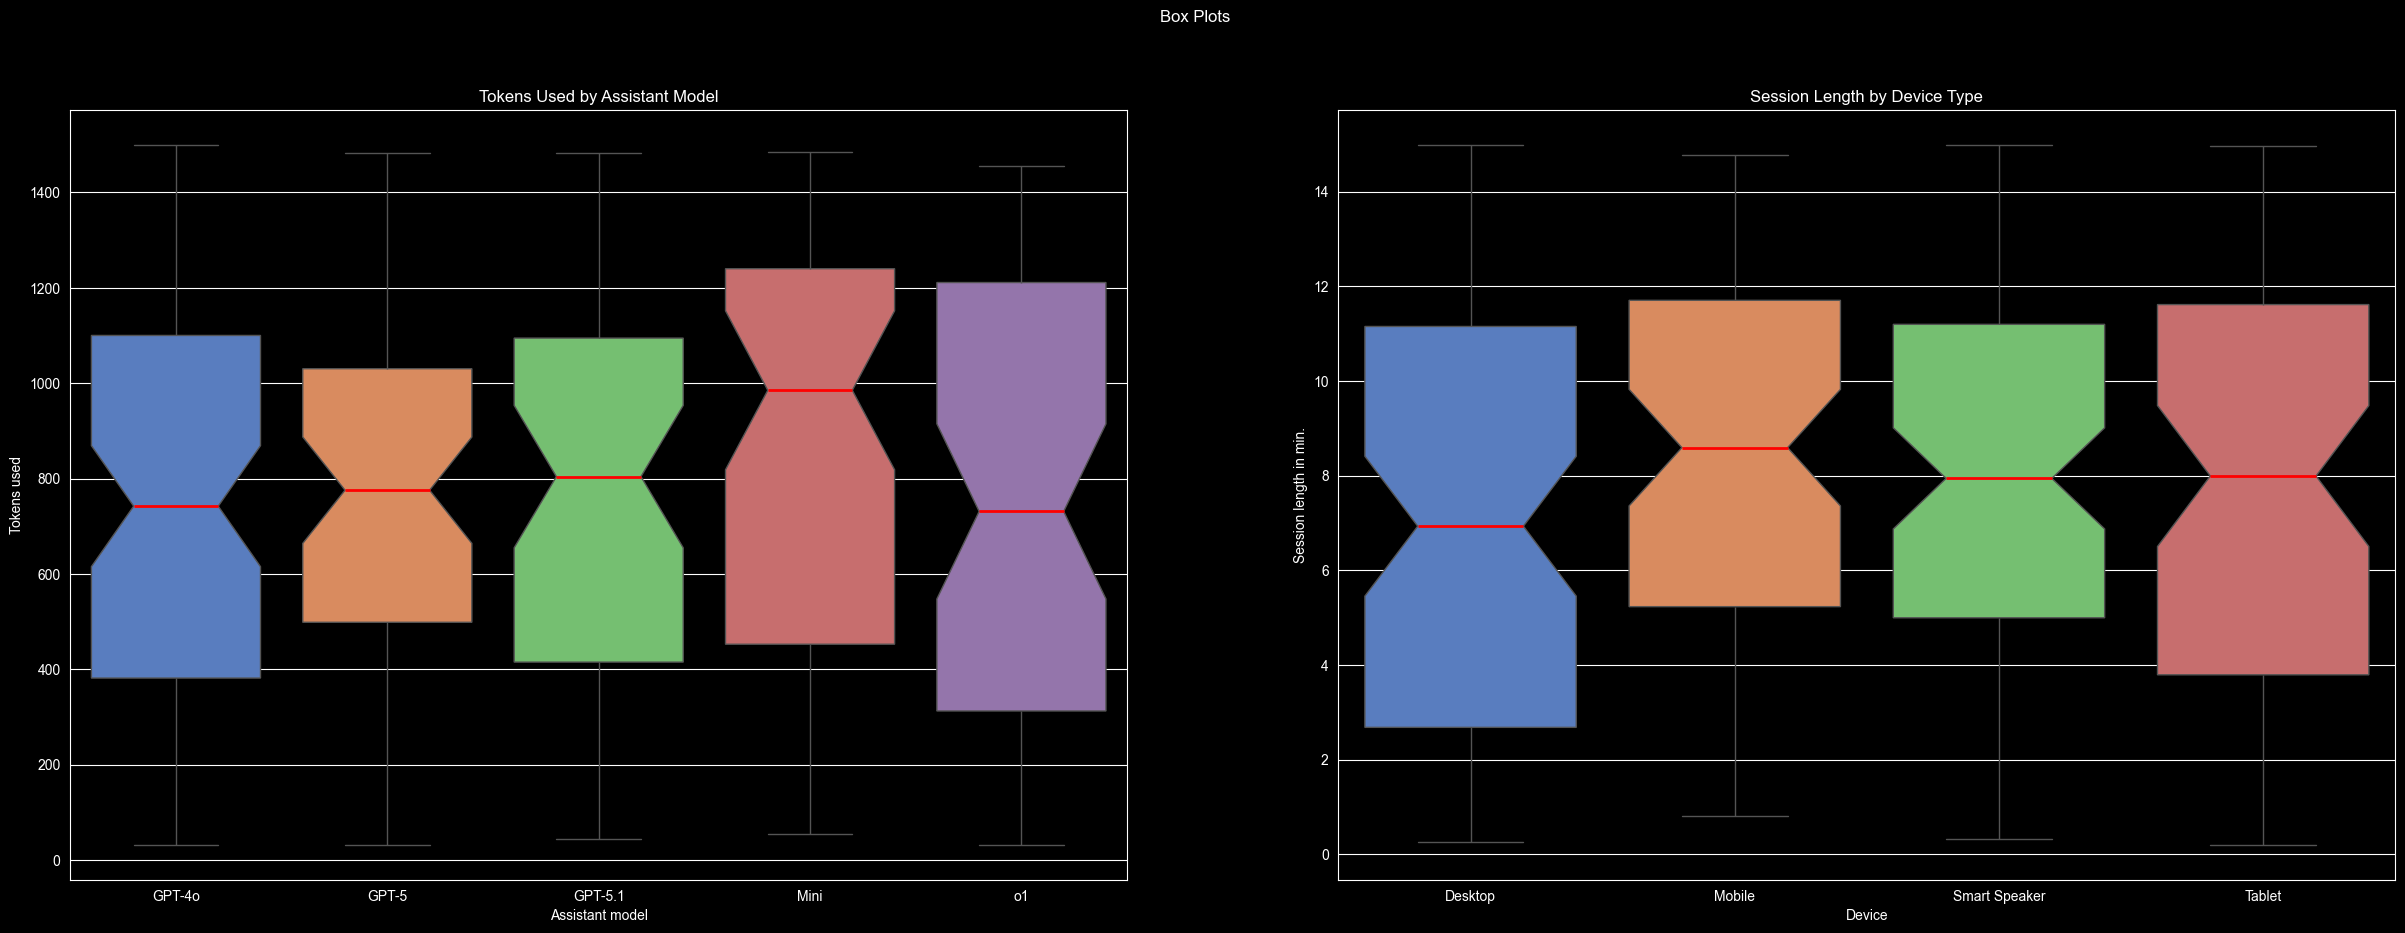

In [14]:
## code for data analysis here

#Visualizations:
#– Plot distributions of key features using histograms, KDE plots, and boxplots.
#– Use color to distinguish individual assistants.

def nicer_dicer(axis,ticks=False):
    """Removes underscores from x and y axis labels because it looks better"""
    if not ticks:
        axis.set_xlabel(axis.get_xlabel().capitalize().replace("_", " ").replace("minutes", "in min."))
        axis.set_ylabel(axis.get_ylabel().capitalize().replace("_", " ").replace("minutes", "in min."))
    else:
        axis.set_xticklabels([axis_sel.get_text().capitalize().replace("_", " ").replace("minutes", "in min.") for axis_sel in axis.get_xticklabels()])
        axis.set_yticklabels([axis_sel.get_text().capitalize().replace("_", " ").replace("minutes", "in min.") for axis_sel in axis.get_yticklabels()])
        print(axis.get_xticklabels())



#
# HISTOGRAMS
#

fg, axes = plot.subplots(1, 3, figsize=(30, 10))
fg.suptitle("Histograms (∑300 entries)")

#  sea.kdeplot(data=RAW_data, x="satisfaction_rating", hue="assistant_model", fill=True,alpha=.1,palette="muted")
#  plot.gca().axes.get_yaxis().set_visible(False) # Hide "Density" label since it's annoying


# Histograms are chosen to show the distribution amongst assistant models and devices.
# This helps to visualize which moedels and devices are actually being used. (NOTE: this sample size is quite small (300 entries) so the data might not be real world applicable)
# I cannot imagine that smart speakers are the most used platform for AI assistants, but hey, who knows! maybe i just havn't kept in touch with the latest trends :')
# NOTE: who TF uses a smart speaker???

sea.histplot(ax=axes[0],data=RAW_data, x="assistant_model",stat="count", palette="muted", hue="assistant_model",legend=False)
axes[0].set_title("Assistant Model count")
nicer_dicer(axes[0])
print("Most people seem to use GPT-4o, which is interesting as it is not exactly the cheapest model available.")



#  axes[1].tick_params(left=False)  # Remove y-axis ticks

print("The biggest platform is relatively suprising: smart speakers. I assume that this means devices like Amazon Alexa and Google Home, which is interesting since these devices are not really known for their AI capabilities. Wired... and interesting!")


sea.histplot(ax=axes[1],data=RAW_data, x="usage_category", palette="muted", hue="usage_category",legend=False)


#sea.histplot(ax=axes[2],data=RAW_data, x="usage_category",palette="muted", hue="device",multiple="stack")


#sea.histplot(ax=axes[2],data=RAW_data, x="device",palette="muted",alpha=.5, hue="usage_category",multiple="stack")

axes[1].set_title("Usage Category count")
axes[1].set_ylabel('')  # Remove y-axis label
axes[1].tick_params(axis='x', labelrotation=45) # super Fancy 45° rotation for extra coolness
nicer_dicer(axes[1])



sea.histplot(ax=axes[2],data=RAW_data, x="device", palette="muted", hue="device",legend=False,alpha=.25)
axes[2].set_title("Device count")

#  axes[2].set(yticklabels=[])
axes[2].set_ylabel('')  # Remove y-axis label
nicer_dicer(axes[2])

axes_2_overlay = axes[2].twinx()# This combines two plots into one (so both the use counts of devices and the breakdown into usage categories can be seen AT THE SAME TIME.)

sea.countplot(ax=axes_2_overlay, data=RAW_data, x="device", hue="usage_category", palette="muted") # This is so cool. I love it.
axes_2_overlay.set_ylabel('Usage Count')  # Remove y-axis label
axes_2_overlay.get_xticklabels()[0].set_color(sea.color_palette("muted")[0])





print("The most common usage for AI seems to be education. Depending on the definition of this category, this could mean that a lot of people are using these assistats for homework and study-help.")
print("This honestly makes me question where this data is from, since I would expect a LOT more people to use AI in a more professional setting (work, coding, writing etc.) rather than for education.")
print("Coding one of the least common, which is very suprising to me, considering that AI coding assistants are one of the more ACTUALY USEFUL applications of AI right now. Interesting!")

#desktop_writing
#print(RAW_data[(RAW_data["device"]=="Smart Speaker") & (RAW_data["usage_category"]=="Coding")].value_counts()) #?????????????? -> Why would someone use a smart speaker for coding??? -- This dataset is definetly not real. (Alexa, commit & push the code.)


plot.show()


#
# KDE PLOTS
#
kdeplots_defcon={"alpha":.25,"fill":True,"palette":"muted","common_norm":False} # Default parameters for all KDE plots via **UNPACKING MY BELOVED

def cts_kdeplot(ax, data, x, hue,title=None) -> None: # Helper function for creating KDE plots
    sea.kdeplot(ax=ax,data=data, x=x, hue=hue, **kdeplots_defcon) # Makes the KDE plot
    ax.set_xlim(data[x].min(),data[x].max()) # Set x-axis limits (removes tapering of the KDE at the edges)
    ax.set_title(f"{x} by {hue} type" if title is None else title) # Title formatting
    sea.move_legend(ax, "lower left") # self-explanatory
    ax.set(yticklabels=[]) # Remove y-axis numbers
    ax.set_ylabel('')  # Remove y-axis label
    ax.tick_params(left=False)  # Remove y-axis ticks
    nicer_dicer(ax)



# KDE plots are chosen to show the distribution of
#
#


fg, axes = plot.subplots(1, 3, figsize=(30, 10))
fg.suptitle("KDE Plots YEAHHH")

cts_kdeplot(axes[0],RAW_data,"session_length_minutes","device","session length by device type")

print("This is actually quite interesting! The session length seems to be shorter on desktop devices compared to mobile devices, which is wired. (one would think that desktop users would spend more time because of work/study etc.)")
print("Similarly, tablets have the longest session lengths on average. This divide between mobile and desktop could stem from the different use cases for each device type. (or the time it takes to type / enter prompts)")
print("This points towards desktop users using the AI assistant for quick queries, while mobile/tablet users might be engaging in longer interactions. Strange!")

cts_kdeplot(axes[1],RAW_data,"prompt_length","device","prompt length by device type")

print("Looking at the prompt lengths, we can see that desktop users tend to have longer prompts on average compared to mobile and tablet users.")
print("This could be due to the ease of typing on a physical keyboard, allowing for longer and more complex prompts. This is pretty strange though, since the session lengths were shorter on desktop.")

cts_kdeplot(axes[2],RAW_data,"tokens_used","assistant_model","tokens used by model type")

print("As expected, the more advanced models like GPT-5 and GPT-4o tend to use more tokens on average compared to older models like o1.")
print("However, mini seems to use the most tokens on average, which could either stem from its use (longer prompts on average) or its complexity. (which is weired since mini is supposed to be a smaller model). Strange again!")

plot.show()


#
# BOXPLOTS LEZGO
#

fg, axes = plot.subplots(1, 2, figsize=(30, 10))
fg.suptitle("Box Plots")


#sea.boxplot(ax=axes[0],data=RAW_data, x="assistant_model",hue="assistant_model", y="satisfaction_rating", palette="muted",medianprops={"color": "r", "linewidth": 2},notch=True)

sea.boxplot(ax=axes[0],data=RAW_data, x="assistant_model",hue="assistant_model", y="tokens_used", palette="muted",medianprops={"color": "r", "linewidth": 2},notch=True)
axes[0].set_title("Tokens Used by Assistant Model")
nicer_dicer(axes[0])

print("assistant model vs tokens used is actually quite interesting (genuenly!). One can see that the \"advancedness\" of the model doesn't really correlate with the number of tokens used. This could either point towards good optimization of the newer models, or simply that users are using the models in different ways.")
print("Mini seems to have the highest median token, whilst having a relatively big spread. The token size seems to vary quite a lot.")

print("device to session length is also notable, in that the session length seems to be quite stable across the different device types. The spread is also quite small (ranging from ~11 to ~5 minutes on most devices)")


#print("Interestingly enough, most models seem to have an completely identical satisfaction rating distribution. This is quite suprising and implies that this data might be synthetic. (i calculated it myself and all models have a mean of exactly 3 with max of .2 difference). Seems like there should be a bigger difference between models, especially considering that each model should (at least in theory) improved over the last.")
#print("GPT-5 seems to have the lowest satisfaction, however, the 5.1 version has the highest satisfaction. This could point towards some issues with GPT-5 that were fixed in 5.1. IG")

# <ignore_this>
print(RAW_data[["assistant_model","satisfaction_rating"]].groupby("assistant_model").mean())
print(RAW_data[["assistant_model","satisfaction_rating"]].groupby("assistant_model").quantile(.75))
print(RAW_data[["assistant_model","satisfaction_rating"]].groupby("assistant_model").quantile(.25))
# </ignore_this>



sea.boxplot(ax=axes[1],data=RAW_data, x="device",hue="device", y="session_length_minutes", palette="muted",medianprops={"color": "r", "linewidth": 2},notch=True)
axes[1].set_title("Session Length by Device Type")
nicer_dicer(axes[1])
plot.show()


#  sea.boxplot(data=RAW_data, x="assistant_model",hue="assistant_model", y="session_length_minutes", palette="muted")
#  plot.title("Boxplot of Session Length by Assistant Model")
#  plot.show()




In [ ]:
# Are there any features that clearly differentiate device types?


# usage_category seems to be a good indicator as every device has a different, relatively high occurrence in one specific category.
# Desktop -> Research
# Mobile -> uniquely low coding
# Smart Speaker -> Productivity (for whatever reason)
# Tablet -> low research
# It's not perfect, but this feature could be used to a reasonable degree to differentiate device types. (especially if all sub-categories are taken into account at once)

# Session_length_minutes and prompt_length are semi-useful in this case, because there are some slight differences in the distribution
# f.e. Desktop users tend to have shorter session lengths on avg. compared to tablet users
# And smart speaker users tend to have a very narrow session length distribution (around 8 minutes)



In [ ]:
# Correction Analysis
# - Create a correlation heatmap for all features
# - Which features are strongly correlated with each other?
# - Are any features highly correlated with assistant models and session length?




RAW_copy = RAW_data.copy().drop(columns=["year","timeOfDay"])

for col in RAW_copy.select_dtypes(include=["category"]).columns:
    RAW_copy[col] = RAW_copy[col].cat.codes # Convert categories to numerical codes to correlate them (the assignment specifically says to correlate ALL features, so this is necessary)


for col in RAW_copy.select_dtypes(include=np.number).columns: # apperently this is redundant.
    RAW_copy[col] = (RAW_copy[col] - RAW_copy[col].min()) / (RAW_copy[col].max() - RAW_copy[col].min()) # Normalization

print(RAW_copy.head())

corr = RAW_copy[RAW_copy.columns.difference(["year"])].corr(numeric_only=True)
#print(corr)

mask = np.triu(np.ones_like(corr, dtype=bool))# This cuts the heatmap in half, since the correlation matrix is symmetrical - Nice!

axis = sea.heatmap(corr, annot=True, fmt=".2f",mask=mask, cmap="viridis")
axis.set_title("Correlation Heatmap of Features")
nicer_dicer(axis,ticks=True)
axis.set_xticks(axis.get_xticks()-1)
axis.set_yticks(axis.get_yticks()+1) # This removes the (after trianle masking) no longer needed ticks / labels in the empty spaces
#axis.tick_params(axis='x', labelrotation=60) # super Fancy 45° rotation for extra coolness #Number 2 Edit: Nvm, looks like ---
#axis.set_xticklabels([x.get_text() if i == 0 else "" for i, x in enumerate(axis.get_xticklabels())])

plot.show()

print("There are no really strong correlations between ANY features. The strongest correlations are between [satisfaction:rating, prompt_length] and [usage_category, promplt_length]. both hover arround .1 which is quite weak.")
print("This is relatively suprising, as one would imagine that at least some features would have some correlation (like tokens_used and prompt_length). This is another indicator that this dataset might be synthetic. (like the coding on smart speakers...)")

print("the most associated feature with assistant_model is usage_category at .06. This is, again, quite weak. It makes sense though, other than the fact that it is the strongest correlation.")

print("The most associated feature with session_length_minutes is tokens_used at .07. Again, no real correlation. This one really doesn't make sens though.")




In [ ]:
# Use pair plots to explore feature relationships, color-coded by the assistant model

#axis = sea.pairplot(RAW_copy[RAW_copy.columns.difference(["year","timeOfDay"])] , hue="assistant_model", palette="muted", diag_kind="kde")

axis = sea.pairplot(RAW_data[RAW_data.columns.difference(["year","timeOfDay","satisfaction_rating"])] , hue="assistant_model", palette="muted")

for ax in axis.axes.flatten():
    nicer_dicer(ax)
plot.suptitle("Pair Plot of Features by Assistant Model",y =1) # for some reason the title overlaps with the plots without y=1
plot.show()
print("To be quite honest, i don't really know what to make of this. There are no clear patterns or relationships that stand out. This alignes pretty well with the correlation heatmap from before and with the assumption that this dataset might possibly maybe be synthetic.")
print("The correlations look like random noise, with no real patterns or relationships that can be found. Not even a little bit of a trend.")

In [ ]:
# Grouped by assistant model, calculate mean, median and standard deviation for each feature.
# - What patterns do you observe?

#detailed_stats = RAW_data.select_dtypes(include=['number']).groupby("assistant_model")
detailed_stats = RAW_data.select_dtypes(include=['number']) # Get all numeric features
detailed_stats.drop(columns=["year"],inplace=True)# drop year for stats
detailed_stats = detailed_stats.assign(assistant_model=RAW_data["assistant_model"])# add assistant_model back for grouping
detailed_stats = detailed_stats.groupby("assistant_model")# grouping

print("MEAN VALUES ::")
print(detailed_stats.mean())

print("All means are relatively close to each other across all models with only a few exceptions.")
print("o1 has a notably low mean session_length_minutes (7.18) compared to other models which hover around 7.5-8.1 minutes.")
print("Mini has a notably high mean tokens_used (882) which is way above other models which are all arround 740-765. This effect can also be observed in the boxplot from before.")



print("\n\nMEDIAN VALUES ::")
print(detailed_stats.median())

print("the medians are also relatively close to each other (in some cases, aka satisfaction_rating, they are identical).")
print("The only real exception is in tokens_used where the spread is quite high. o1, GPT-4o and GPT-5 are relatively low (arround 730-775), whilst GPT-5.1 is quite high (805) and mini is, again, very high at a whopping 985 tokens.")

print("\n\nSTANDARD DEV. VALUES ::")
print(detailed_stats.std())

print("The standard deviations differ more between models compared to the means and medians.")
print("prompt_length has a notably low std.dev for Mini (58.5) compared to other models which are all arround 70-75.")
print("\n\n The conclusion I draw from this is that the models are quite similar in most cases, with 01 and Mini being the most notable outliers.")



In [ ]:
#Time-Based Analysis:
#– How does session length vary by day or time of day?
#– Are there peak usage times for certain assistants?
#– Create a line plot or a heatmap to show usage trends over time.

# Allrighty then, L E T S  G O
# NOTE: I am coding this on my alexa, github enabled, smart speaker, so please excuse any typos in my code!
#⣿⣿⣿⣿⣿⣿⣿⣿⡿⠿⠛⠛⠛⠋⠉⠈⠉⠉⠉⠉⠛⠻⢿⣿⣿⣿⣿⣿⣿⣿⠀
#⣿⣿⣿⣿⣿⡿⠋⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠛⢿⣿⣿⣿⣿⠀
#⣿⣿⣿⣿⡏⣀⠀⠀⠀⠀⠀⠀⠀⣀⣤⣤⣤⣄⡀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣿⣿⠀
#⣿⣿⣿⢏⣴⣿⣷⠀⠀⠀⠀⠀⢾⣿⣿⣿⣿⣿⣿⡆⠀⠀⠀⠀⠀⠀⠀⠈⣿⣿⠀
#⣿⣿⣟⣾⣿⡟⠁⠀⠀⠀⠀⠀⢀⣾⣿⣿⣿⣿⣿⣷⢢⠀⠀⠀⠀⠀⠀⠀⢸⣿⠀
#⣿⣿⣿⣿⣟⠀⡴⠄⠀⠀⠀⠀⠀⠀⠙⠻⣿⣿⣿⣿⣷⣄⠀⠀⠀⠀⠀⠀⠀⣿⠀
#⣿⣿⣿⠟⠻⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠶⢴⣿⣿⣿⣿⣿⣧⠀⠀⠀⠀⠀⠀⣿⠀
#⣿⣁⡀⠀⠀⢰⢠⣦⠀⠀⠀⠀⠀⠀⠀⠀⢀⣼⣿⣿⣿⣿⣿⡄⠀⣴⣶⣿⡄⣿⠀
#⣿⡋⠀⠀⠀⠎⢸⣿⡆⠀⠀⠀⠀⠀⠀⣴⣿⣿⣿⣿⣿⣿⣿⠗⢘⣿⣟⠛⠿⣼⠀
#⣿⣿⠋⢀⡌⢰⣿⡿⢿⡀⠀⠀⠀⠀⠀⠙⠿⣿⣿⣿⣿⣿⡇⠀⢸⣿⣿⣧⢀⣼⠀
#⣿⣿⣷⢻⠄⠘⠛⠋⠛⠃⠀⠀⠀⠀⠀⢿⣧⠈⠉⠙⠛⠋⠀⠀⠀⣿⣿⣿⣿⣿⠀
#⣿⣿⣧⠀⠈⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠟⠀⠀⠀⠀⢀⢃⠀⠀⢸⣿⣿⣿⣿⠀
#⣿⣿⡿⠀⠴⢗⣠⣤⣴⡶⠶⠖⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣀⡸⠀⣿⣿⣿⣿⠀
#⣿⣿⣿⡀⢠⣾⣿⠏⠀⠠⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠛⠉⠀⣿⣿⣿⣿⠀
#⣿⣿⣿⣧⠈⢹⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣰⣿⣿⣿⣿⠀
#⣿⣿⣿⣿⡄⠈⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣠⣴⣾⣿⣿⣿⣿⣿⠀
#⣿⣿⣿⣿⣧⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣠⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⠀
#⣿⣿⣿⣿⣷⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣴⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠀
#⣿⣿⣿⣿⣿⣦⣄⣀⣀⣀⣀⠀⠀⠀⠀⠘⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠀
#⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⡄⠀⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠀
#⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣧⠀⠀⠀⠙⣿⣿⡟⢻⣿⣿⣿⣿⣿⣿⣿⣿⣿⠀
#⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠇⠀⠁⠀⠀⠹⣿⠃⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⠀
#⣿⣿⣿⣿⣿⣿⣿⣿⡿⠛⣿⣿⠀⠀⠀⠀⠀⠀⠀⠀⢐⣿⣿⣿⣿⣿⣿⣿⣿⣿⠀
#⣿⣿⣿⣿⠿⠛⠉⠉⠁⠀⢻⣿⡇⠀⠀⠀⠀⠀⠀⢀⠈⣿⣿⡿⠉⠛⠛⠛⠉⠉⠀
#⣿⡿⠋⠁⠀⠀⢀⣀⣠⡴⣸⣿⣇⡄⠀⠀⠀⠀⢀⡿⠄⠙⠛⠀⣀⣠⣤⣤⠄⠀⠀


RAW_data["hour"] = RAW_data["timestamp"].dt.hour
RAW_data["dayofweek"] = RAW_data["timestamp"].dt.dayofweek
daylist = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
RAW_data["dayofweek_name"] = RAW_data["dayofweek"].apply(lambda x: daylist[x])

timeofday_def = {(5,11):"Morning", (11,17):"Midday", (17,23):"Evening", (23,5):"Night"}
def _map_timeofday_def(hour):
    for x in timeofday_def.keys():
        if hour >= x[0] and hour < x[1]:
            return timeofday_def[x]
        elif x[0] > x[1]: # for the night range which wraps around midnight
            if hour >= x[0] or hour < x[1]:
                return timeofday_def[x]
    raise ValueError(f"Hour not in any defined range {hour}") #should never happen

RAW_data["timeofday"] = RAW_data["hour"].apply(_map_timeofday_def) # had to google what the translation for "mittag" is. is midday even a word???
#print(RAW_data[["timestamp","hour","dayofweek","timeofday"]].head(10))



fg, axes = plot.subplots(1, 2, figsize=(30, 10))
fg.suptitle("Time-Based Analysis via Boxplots")

sea.boxplot(ax=axes[0],data=RAW_data, x="timeofday",hue="timeofday", y="session_length_minutes", palette="muted",medianprops={"color": "r", "linewidth": 2},notch=True,order=timeofday_def.values())
axes[0].set_title("Session Length by Time of Day")
nicer_dicer(axes[0])
print("session_length_minutes seems to be quite stable across the day. There is a slight trend towards longer sessions the later it gets, but it's quite small")


sea.boxplot(ax=axes[1],data=RAW_data, x="dayofweek_name",hue="dayofweek_name", y="session_length_minutes", palette="muted",medianprops={"color": "r", "linewidth": 2},notch=True,order = daylist)
axes[1].set_title("Session Length by Day of Week")
nicer_dicer(axes[1])
print("The day of the week however varies quite a lot, which is suprising (and a welcome change from the rest of the dataset). Especially monday seems to have notacibly longer sessions compared to other days. the spread is also quite high across the board.")
plot.show()






fg, axes = plot.subplots(1, 2, figsize=(30, 10))
fg.suptitle("Time-Based Analysis via Histograms")

cts_kdeplot(axes[0],RAW_data,"hour","assistant_model","session hour by assistant model over the day")
print("There seems to be a noticable falloff in the usage of Mini during later hours, whilst other models remain relatively stable. The general trend seems to be a slight decrease the later it gets, which makes sense.")
print("the only exception to this rule is GPT-5 which slightly increases in usage during the night")
print("Overall, the usage seems to have noticable peaks for each model (excl. o1 and GPT-5.1).")



cts_kdeplot(axes[1],RAW_data,"session_length_minutes","dayofweek_name","session length by day of week")

plot.show()



fg, axes = plot.subplots(1, 2, figsize=(30, 10))
fg.suptitle("Time-Based Analysis via Boxplots")

hourly_session_length = (RAW_data.groupby("hour")["session_length_minutes"].mean().reset_index()) # calculate mean session_length per hour



sea.lineplot(ax=axes[0],data=hourly_session_length, x="hour", y="session_length_minutes", palette="muted")
axes[0].set_title("Session Length by Time of Day")
nicer_dicer(axes[0])


sea.lineplot(ax=axes[1],data=RAW_data, x="timeofday",hue="assistant_model", y="session_length_minutes", palette="muted")
axes[1].set_title("Session Length by Day of Week")
nicer_dicer(axes[1])

plot.show()


corr = RAW_data.pivot(index="timestamp", columns="usage_category", values="hour")

mask = np.triu(np.ones_like(corr, dtype=bool))# This cuts the heatmap in half, since the correlation matrix is symmetrical - Nice!

axis = sea.heatmap(corr, annot=True, fmt=".2f",mask=mask, cmap="viridis")
axis.set_title("Correlation Heatmap of Features")
nicer_dicer(axis,ticks=True)
axis.set_xticks(axis.get_xticks()-1)
axis.set_yticks(axis.get_yticks()+1) # This removes the (after trianle masking) no longer needed ticks / labels in the empty spaces

plot.show()

## Additional Insights
 - Additional Notes etc...

In [ ]:
#1 custom Analysis one The time period of this dataset is 3 months 10 days or 69 days
time_period = RAW_data['timestamp'].max() - RAW_data['timestamp'].min()
print(f"The time period of this dataset is {time_period.days} days")
# the time period of this dataset is only 69 days

#2 custom Analysis two The average satisfaction rating per model
satisfactionR = RAW_data.groupby('assistant_model')['satisfaction_rating'].mean().round(2)
print(satisfactionR)

#from here we can see that 01 is the one with the highest satisfaction rating 3.1 while gpt-4 has the lowest with 2.96

#3 custom Analysis three The relation btw device and Usage category
device_usage_category = pd.pivot_table(RAW_data, index='device', columns='usage_category', aggfunc='count', values='timestamp')
plt.figure(figsize = (10,10))
device_usage_category.plot(kind='bar')
plt.show()

# here we analyze the relation between device and usage category , we can see that for any reason speaker is the most used device for productivity tasks and coding Btw others
#4 custom Analysis - the relationship betweeen weekday and time of day
time_data = RAW_data.copy()

time_data['weekday'] = time_data['timestamp'].dt.day_name()
grouped = time_data.groupby(['weekday', 'timeOfDay']).size().unstack(fill_value=0)
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped = grouped.reindex(week_order)
plt.figure(figsize=(10,8))
sea.heatmap(grouped, annot=True)
plt.show()



#5 custom Analysis - Average session length per usage category
avg_session_by_task = RAW_data.groupby('usage_category', as_index=False)['session_length_minutes'].mean()
avg_session_by_task = avg_session_by_task.sort_values('session_length_minutes',ascending=False)
print("Average session length by task type:\n", avg_session_by_task)
plt.figure(figsize=(10,6))
sea.barplot(data=avg_session_by_task, x='usage_category', y='session_length_minutes')
plt.show()

